In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras.regularizers import L1, L2, L1L2
###
import tensorflow.keras.utils as ku 
import numpy as np 

from tensorflow import keras

# 1 Data

## 1.1 Get the data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

--2020-12-16 09:56:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-12-16 09:56:50 (79.9 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



## 1.2 Tokenize the corpus

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

## 1.3 Create Inputs and Labels

### 1.3.1 n-gram and Input Sequences

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

### 1.3.2 Pad sequences

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

### 1.3.3 inputs and labels

In [ ]:
xs, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# 2 Model

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(total_words, 64, input_length = max_sequence_len - 1),
                                 keras.layers.Bidirectional(keras.layers.LSTM(20, return_sequences = True)),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Bidirectional(keras.layers.LSTM(20)),
                                 keras.layers.Dense(256, kernel_regularizer=L2(0.01), activation="relu"),
                                 keras.layers.Dense(total_words, activation="softmax")
])


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            205504    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            13600     
_________________________________________________________________
dropout (Dropout)            (None, 10, 40)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              825227    
Total params: 1,064,587
Trainable params: 1,064,587
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(xs, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.9790 - accuracy: 0.0221
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5239 - accuracy: 0.0232
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4472 - accuracy: 0.0237
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3810 - accuracy: 0.0239
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2953 - accuracy: 0.0274
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2181 - accuracy: 0.0301
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1451 - accuracy: 0.0330
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0783 - accuracy: 0.0349
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0146 - accuracy: 0.0374
Epoch 10/100
484/484 [==============================] - 7s 15ms/step - loss: 5.951

# 3 Plot Accuracy and Loss

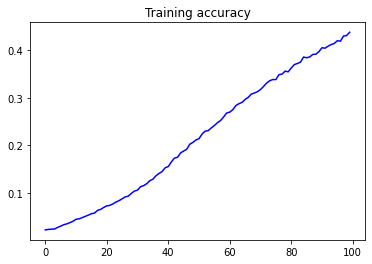

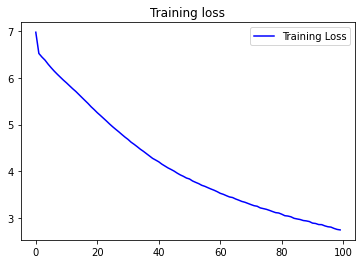

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# 4 Predict - Generate Sonnet

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope to thine eye doth friend ' held young to still slain remain remain grow more rage leaves out to win me groan ye seen decrease crime bail glory with bear bear stand thee their chief hell my steel cold out lived hearted near exceeds exceeds sit lie with so confounds me days days now none last things torn ' grow lie so but so but here still convertest young still there new check me all my infection took slow mother bail rotten sad bell race plot rotten commend sad race sky smoke smoke rotten sad race smoke smoke smoke rotten
